# Régression linéaire 
## Mini brief projet 
### 1. Chargement de données 

In [1]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing(as_frame=True)
#description du dataset 
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [2]:
print(dataset.feature_names[0:6])
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

### Préparation des données
#### Transformation de dataframe

In [3]:
import numpy as np 
import pandas as pd

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)


dataset.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:

# créer une colonne prix 
df['PRICE'] = dataset.target
# vérifier le nombre de valeurs nulles 
# code ici 

df.head

<bound method NDFrame.head of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Lo

#### base d'apprentissage et de test 

In [5]:
from sklearn.model_selection import train_test_split# features
X = df.drop(["PRICE"], axis=1)

# target
y = df['PRICE']


x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)# code ici 

### Exploration de données
Pour choisir les variables d'entrée (features) on procède à une étude de corrélation 

<Axes: >

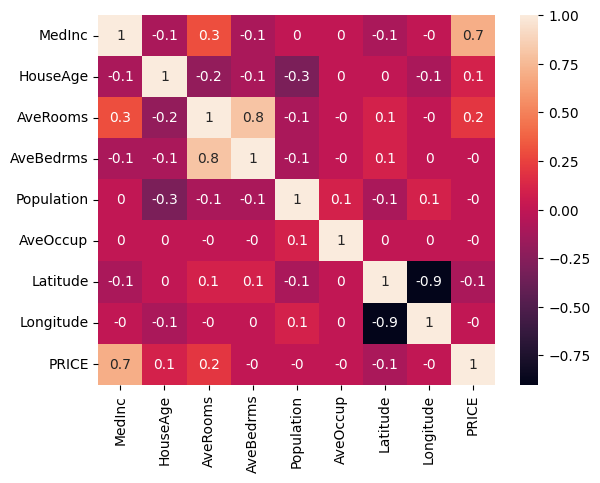

In [6]:
import seaborn as sns
matrice_corr = df.corr().round(1)
sns.heatmap(data=matrice_corr,annot=True)

<Axes: >

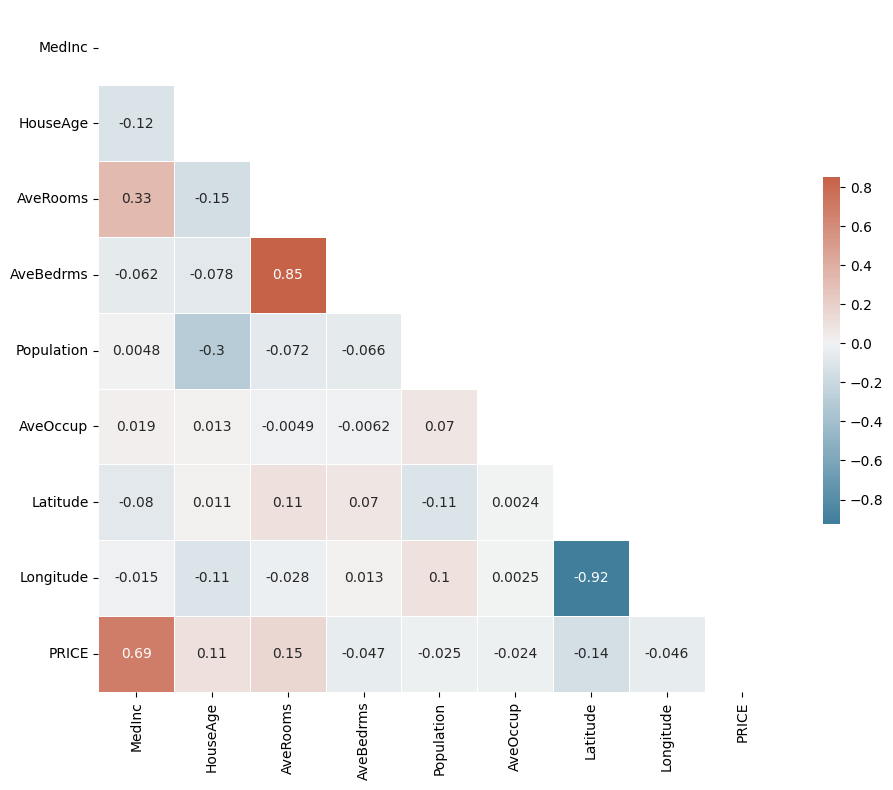

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
 
mask = np.triu(np.ones_like(corr, dtype=bool))
 
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
 
sns.heatmap(corr, mask=mask, cmap=cmap,  center=0, square=True, linewidths=.5,cbar_kws={"shrink": .5},  annot=True)

In [8]:
# Sélectionner les colonnes spécifiques pour l'ensemble d'entraînement
x_train = df.drop(['PRICE',], axis=1)

x_train_filtred,x_test_filtred,y_train,y_test = train_test_split(x_train, y, test_size=0.2, random_state=928)# code ici 

### Modèle de régression linéaire

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
 
lmodellineaire = LinearRegression()# code ici 

# train model 
reg = lmodellineaire.fit(x_train_filtred, y_train)

In [17]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Sélectionner les colonnes spécifiques pour l'ensemble d'entraînement
x_train = df.drop(['PRICE'], axis=1)

# Diviser les données en ensemble d'entraînement et ensemble de test
x_train_filtred, x_test_filtred, y_train, y_test = train_test_split(x_train, y, test_size=0.2, random_state=928)

# Créer l'estimateur
model = LinearRegression()

# Entraîner le modèle
model.fit(x_train_filtred, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred = model.predict(x_test_filtred)

# Calculer le score R2 sur l'ensemble de test
r2 = r2_score(y_test, y_pred)

# Utiliser le meilleur modèle trouvé
print("Meilleur random_state:", best_random_state)
print("Meilleur R2 :", best_score)


Meilleur random_state: 928
Meilleur R2 : 0.650208398635969


In [16]:
# Score du modèle sur l'ensemble d'entraînement
train_score = reg.score(x_train_filtred, y_train)
print("Score sur l'ensemble d'entraînement :", train_score)

# Prédire les valeurs sur l'ensemble de test
y_pred = reg.predict(x_test_filtred)

# Calculer l'erreur quadratique moyenne sur l'ensemble de test
test_mse = mean_squared_error(y_test, y_pred)
print("MSE :", test_mse)

# Calculer le score R2 sur l'ensemble de test
r2 = r2_score(y_test, y_pred)
print("R2 :", r2)

# Calculer l'erreur absolue moyenne sur l'ensemble de test
mae = mean_absolute_error(y_test, y_pred)
print("MAE :", mae)

Score sur l'ensemble d'entraînement : 0.5948952092936457
MSE : 0.4700651705638808
R2 : 0.6502116104009856
MAE : 0.5108157702145435


### Evaluation du modèle 

# Conclusion 
...

In [ ]:
on obtient le meilleur R2 avec random_state = 928

In [47]:
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Sélectionner les colonnes spécifiques pour l'ensemble d'entraînement
x_train = df.drop(['PRICE'], axis=1)

# Diviser les données en ensemble d'entraînement et ensemble de test
x_train_filtred, x_test_filtred, y_train, y_test = train_test_split(x_train, y, test_size=0.2, random_state=42)

# Définir la grille des hyperparamètres à rechercher
param_grid = {'alpha': [0.1, 1, 10]}

# Créer un objet GridSearchCV
grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, scoring='r2', cv=5)

# Entraîner le modèle
grid_search.fit(x_train_filtred, y_train)

# Obtenir les meilleurs paramètres et le meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Utiliser le meilleur modèle trouvé
lasso_model = grid_search.best_estimator_

# Prédire les valeurs sur l'ensemble de test
y_pred = grid_search.predict(x_test_filtred)

# Calculer le score R2 sur l'ensemble de test
r2 = r2_score(y_test, y_pred)

# Afficher les meilleurs hyperparamètres et les métriques de performance associées
print("Meilleurs hyperparamètres:", best_params)
print("Meilleur R2 :", best_score)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))



Meilleurs hyperparamètres: {'alpha': 0.1}
Meilleur R2 : 0.5484671232192593
Mean Squared Error: 0.613511519805813
Mean Absolute Error: 0.5816074623949866


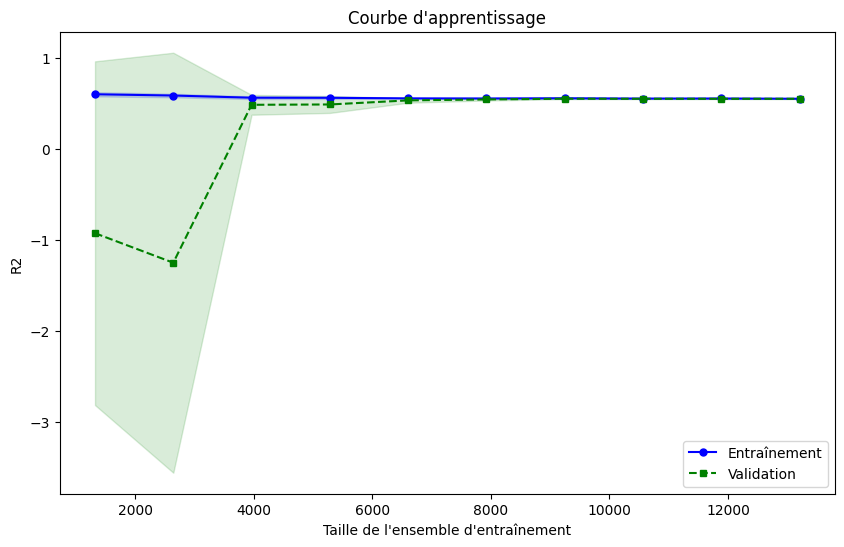

In [48]:
# Créer une courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(estimator=lasso_model,
                                                        X=x_train_filtred,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='r2',
                                                        cv=5)

# Calculer les moyennes et les écart-types des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Entraînement')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('R2')
plt.legend(loc='lower right')
plt.title('Courbe d\'apprentissage')
plt.show()

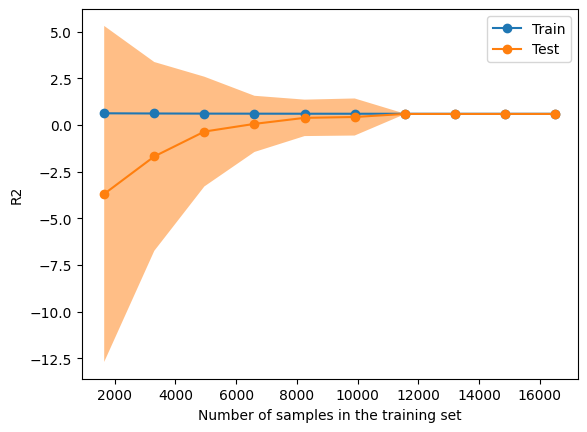

In [59]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve, ShuffleSplit
import numpy as np
from sklearn.linear_model import LinearRegression

# Créer un modèle linéaire (vous devez définir votre modèle)
lmodellineaire = LinearRegression()

# Paramètres communs pour la courbe d'apprentissage
common_params = {
    "estimator": lmodellineaire,
    "X": df.drop(columns=['PRICE']),  # Utilisez "columns" au lieu de "drop"
    "y": df['PRICE'],
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    #"scoring": "r2",  # Utilisez "scoring" au lieu de "score_type"
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between", 
    "score_name": "R2",  
}

# Afficher la courbe d'apprentissage
display = LearningCurveDisplay.from_estimator(**common_params)


In [40]:
# Sélectionner les colonnes spécifiques pour l'ensemble d'entraînement
x_train = df.drop(['PRICE'], axis=1)

# Diviser les données en ensemble d'entraînement et ensemble de test
x_train_filtred, x_test_filtred, y_train, y_test = train_test_split(x_train, y, test_size=0.2, random_state=42)

# Définir la grille des hyperparamètres à rechercher
param_grid = {'alpha': [0.1, 1, 10]}

# Créer un objet GridSearchCV
grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, scoring='r2', cv=5)

# Entraîner le modèle
grid_search.fit(x_train_filtred, y_train)

# Obtenir les meilleurs paramètres et le meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Utiliser le meilleur modèle trouvé
lasso_model = grid_search.best_estimator_

y_train_pred = grid_search.predict(x_train_filtred)
r2_train = r2_score(y_train, y_train_pred)

print("Meilleurs hyperparamètres:", best_params)
print("Meilleur R2 :", best_score)
print("Mean Squared Error:", mean_squared_error(y_train, y_train_pred))
print("Mean Absolute Error:", mean_absolute_error(y_train, y_train_pred))

Meilleurs hyperparamètres: {'alpha': 0.1}
Meilleur R2 : 0.5484671232192593
Mean Squared Error: 0.60300014172392
Mean Absolute Error: 0.579007601149509


In [44]:
model = Lasso(alpha=0.1)

model.fit (x_train_filtred, y_train)

print('R2 train : ', model.score(x_train_filtred, y_train))
print('R2 tets : ', model.score(x_test_filtred, y_test))





R2 train :  0.5489153425707493
R2 tets :  0.531816761031816
